In [1]:
!pip install nibabel

     |████████████████████████████████| 3.3MB 882kB/s eta 0:00:01


In [1]:
import numpy as np
import os 
import nibabel as nib
import matplotlib.pyplot as plt

In [50]:
import json

('R', 'A', 'S')
(88, 179, 692)


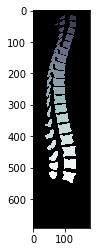

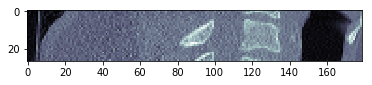

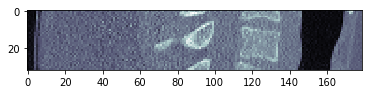

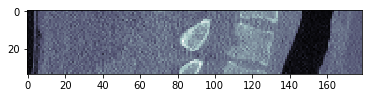

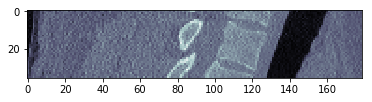

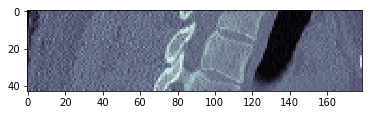

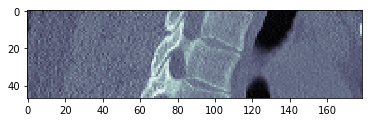

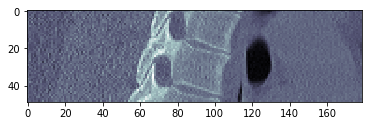

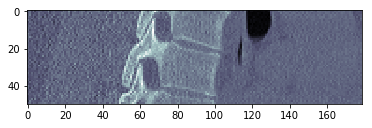

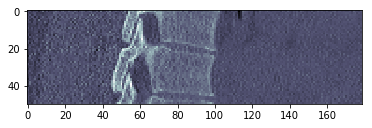

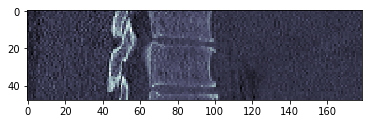

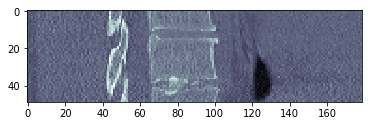

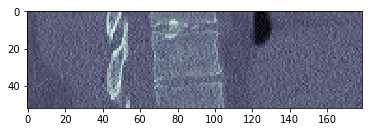

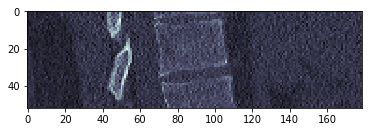

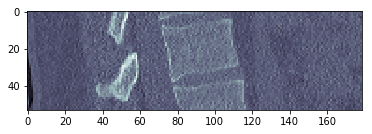

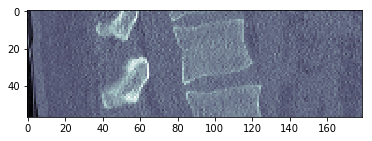

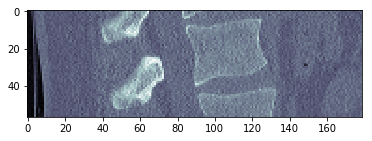

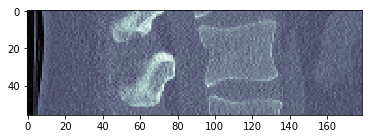

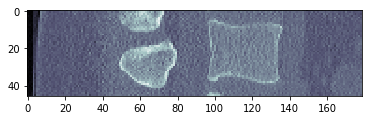

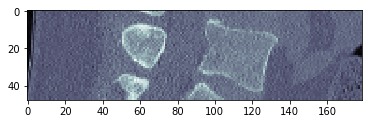

In [95]:
eg2 = nib.load('verse/training_data/verse275.nii.gz')
eg = nib.load('verse/training_data/verse275_seg.nii.gz')

eg2 = nib.as_closest_canonical(eg2)
eg = nib.as_closest_canonical(eg)

print(nib.aff2axcodes(eg.affine))
print(eg.shape)
# flat = np.clip(img.flatten(), 0, None)
# flat = flat[(flat > 0)]
# cutoff = np.mean(flat) + 1.5* np.std(flat)
n = np.rot90(eg.dataobj[int(eg.shape[0]/2),::])
n2 = np.rot90(eg2.dataobj[int(eg2.shape[0]/2),::])
plt.imshow(n, cmap='bone')
verts = np.unique(n.flatten())
for idx, v in enumerate(verts[1:]):
    if (v != 0):
        plt.figure()
        filtered = np.where(n == v,1,0)
        yr = np.where(np.sum(filtered, axis=1) > 0, 1,0)
        t = np.argmax(yr == 1)
        b = len(yr) - np.argmax(yr[::-1]) - 1
        plt.imshow(n2[t-5:b+5], cmap='bone')


In [163]:
prefix = 'verse/training_data/'
tgt_dir = 'verse/clean_training/'
for x in os.listdir(prefix):
    if (x.find('.nii.gz') > -1 and x.find('_seg') == -1):
        fname = prefix + x
        i = nib.load(fname)
        n = i.dataobj[:,:,int(i.shape[2]/2)]
        nib.save(nib.Nifti1Image(n, i.affine), tgt_dir + x)